 # --------------------------------------Predicting Diabetes-----(^_^)----🧁--👀---------------

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

## load the data

In [63]:
df = pd.read_csv("diabetes.csv")

## EDA (part I)

In [64]:
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


In [66]:
df.shape

(390, 16)

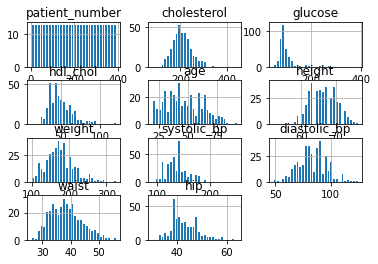

In [67]:
df.hist(bins = 30, ec = "white")
plt.grid(True)

In [68]:
df.describe().apply(lambda e: round(e, 1))

,patient_number,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,waist,hip
count,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0
mean,195.5,207.2,107.3,50.3,46.8,66.0,177.4,137.1,83.3,37.9,43.0
std,112.7,44.7,53.8,17.3,16.4,3.9,40.4,22.9,13.5,5.8,5.7
min,1.0,78.0,48.0,12.0,19.0,52.0,99.0,90.0,48.0,26.0,30.0
25%,98.2,179.0,81.0,38.0,34.0,63.0,150.2,122.0,75.0,33.0,39.0
50%,195.5,203.0,90.0,46.0,44.5,66.0,173.0,136.0,82.0,37.0,42.0
75%,292.8,229.0,107.8,59.0,60.0,69.0,200.0,148.0,90.0,41.0,46.0
max,390.0,443.0,385.0,120.0,92.0,76.0,325.0,250.0,124.0,56.0,64.0


## Preprocessing

transformaing - Cleanning - imputation

In [69]:
def str_to_float (col): 
    new_col = col.str.replace(',', '.').astype(float)
    return new_col

def str_binary (col, txt):
        new_col = col.apply(lambda e: 0 if e == txt else 1)
        return new_col

Converting (object) -----> (float)

In [70]:
df['chol_hdl_ratio'] = str_to_float( df['chol_hdl_ratio'] )

df['bmi'] = str_to_float( df['bmi'] )

df['waist_hip_ratio'] = str_to_float( df['waist_hip_ratio'] )

converting (objects) -----> (Binary) <0, 1> <(Male/Female)...(Diabates/No_Diabates)>

In [71]:
df["gender"] = str_binary(df["gender"], 'female')

df['diabetes'] = str_binary(df['diabetes'], 'No diabetes')

## EDA (part II)

In [72]:
df.dtypes

patient_number       int64
cholesterol          int64
glucose              int64
hdl_chol             int64
chol_hdl_ratio     float64
age                  int64
gender               int64
height               int64
weight               int64
bmi                float64
systolic_bp          int64
diastolic_bp         int64
waist                int64
hip                  int64
waist_hip_ratio    float64
diabetes             int64
dtype: object

In [73]:
df.isna().sum()

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

clean_ transformed data

### Analyze features and target

### is it a balanced data ?

([<matplotlib.patches.Wedge at 0x1b3609e7310>,
 [Text(-0.8899187180267095, 0.6465637441936395, 'NO-Diabetes'),
  Text(0.9708204526849543, -0.7053422209456772, 'Diabetes')])

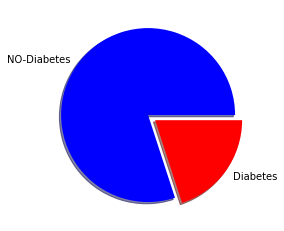

In [74]:
slice= list(round(df['diabetes'].value_counts(normalize = True), 1))
label= ["NO-Diabetes", "Diabetes"]
colors = ["blue", "red"]
explode = [0, 0.1]
plt.pie(slice, labels = label, colors = colors, explode = explode, shadow = True)

0    330
1     60
Name: diabetes, dtype: int64


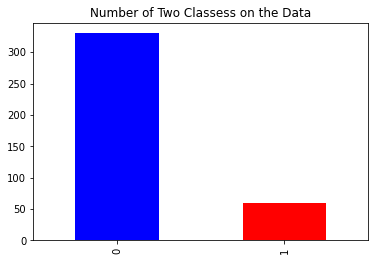

In [75]:
df['diabetes'].value_counts().plot(kind = 'bar', title = "Number of Two Classess on the Data", color = ['blue', 'red'])
print(df['diabetes'].value_counts())

#### Conclusion:
data is unbalanced!

so we wanna make it balanced by applying Resampling on it

we will Specificly apply under_sampling i don't prefare copies (Over_sampling)

and because eda count on ratio we can continue in EDA

### what is max ratio of cholesterol?

In [76]:
df['cholesterol'].max()

443

### what is cholestrol for the oldest patient?

In [77]:
bool_mask = df['age'] == df['age'].max()
print("oldest has :",df['age'].max())
df[bool_mask]['cholesterol']


oldest has : 92


389    165
Name: cholesterol, dtype: int64

#### conclusion:
the oldest man (92 years) in the patient don't has the highest measure for cholestrol

### So...Who has the max measure of Cholestrol?

In [78]:
df[ df['cholesterol'] == df['cholesterol'].max() ]

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
242,243,443,185,23,19.3,51,0,70,235,33.7,158,98,43,48,0.9,1


answer: woman in 52 years old

### the relation between cholestrol measure and Diabateic patient?

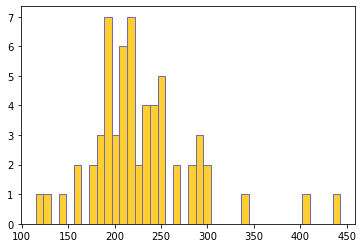

In [79]:
yes = df[ df['diabetes'] == 1 ]
yes['cholesterol'].hist(bins = 40, ec = "#746AB0", color = '#FFCE30')
plt.grid(False)

#### Conclusion:
most common cholestrol for diabetic patient range from 170 to 250

### which gender have the highest glucose measures

In [80]:
df.groupby("gender").mean()['glucose']#---------------------------

gender
0    103.109649
1    113.290123
Name: glucose, dtype: float64

### which two classes has more weight with respect to  their tall?

28.36727272727274
31.021666666666682


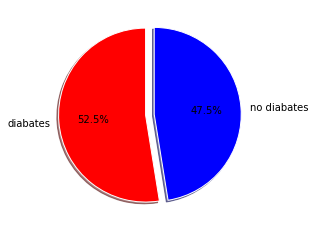

In [81]:
no = df[ df['diabetes'] == 0 ]

yes = df[ df['diabetes'] == 1 ]


print(no['bmi'].mean())
print(yes['bmi'].mean())

mask1 = df['diabetes'] == 1
d_bmi = round(df[mask1].bmi.mean())

mask2 = df['diabetes'] == 0
nd_bmi = round(df[mask2].bmi.mean())

slice = [d_bmi, nd_bmi]
label = ["diabates", 'no diabates']
color = ["red", "blue"]
explode = [0, 0.1]

plt.pie(slice, labels = label,
        colors = color,autopct = '%1.1f%%',
        startangle = 90,shadow = True,
       wedgeprops = {'edgecolor': "white"},
       explode = explode )
plt.show()

### is patient who has diabates are thinner than others?

In [82]:
round(df.groupby("diabetes").mean()['weight'])

diabetes
0    175.0
1    193.0
Name: weight, dtype: float64

### what the average of ages for who have diabates and not?

In [83]:
round(df.groupby("diabetes").mean()['age'])#for ages and diabets

diabetes
0    45.0
1    58.0
Name: age, dtype: float64

### what is the relation between Age and Diabates ?

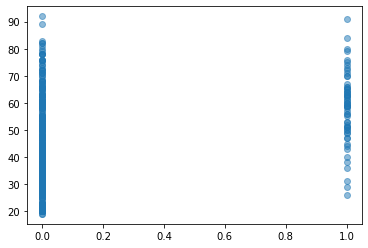

In [84]:
plt.scatter(df['diabetes'], df['age'], alpha = 0.5)
plt.show()

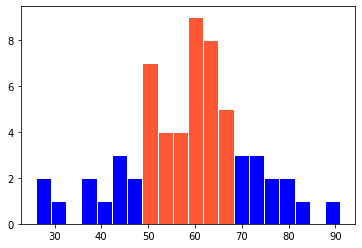

In [85]:
ages = df[df["diabetes"] == 1]['age']
h, bin1, patches = plt.hist(ages, ec = "white", color = "blue", bins =20)
for i in range(0,20):
    if (i < 7) :
        patches[i].set_fc("blue")
    elif i <13 :
        patches[i].set_fc("#FF5733")

conclusions: 

    1-the most age people has diabetes is 60
    
    2-in general people who have diabates its age range from 50 to 65

### is it worthwhile to make pca on this data with respect to its size 

we will see by getting handdirty on the data

Accuracy which will decide

## Feature Selection (PCA Analysis)

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [87]:
X = df.drop('diabetes', axis = 1)
y = df['diabetes']
y.shape

(390,)

In [88]:
scalar = StandardScaler()
X_std = scalar.fit_transform(X)
X_std

array([[-1.72761533, -0.31901328, -0.5646553 , ..., -1.02010483,
        -0.88248912, -0.5659952 ],
       [-1.71873299, -1.37261932, -0.52743157, ..., -0.84629929,
        -0.52894956, -0.70275984],
       [-1.70985065,  0.21899831, -0.60187902, ...,  0.3703395 ,
         0.35489932,  0.117828  ],
       ...,
       [ 1.70985065,  2.10203888, -0.32270108, ..., -1.19391037,
        -0.35217979, -1.66011232],
       [ 1.71873299,  0.55525555,  1.42681407, ..., -0.49868821,
        -0.88248912,  0.52812192],
       [ 1.72761533, -0.94669348, -0.24825362, ...,  2.28220046,
         1.41551798,  1.62223904]])

<AxesSubplot:>

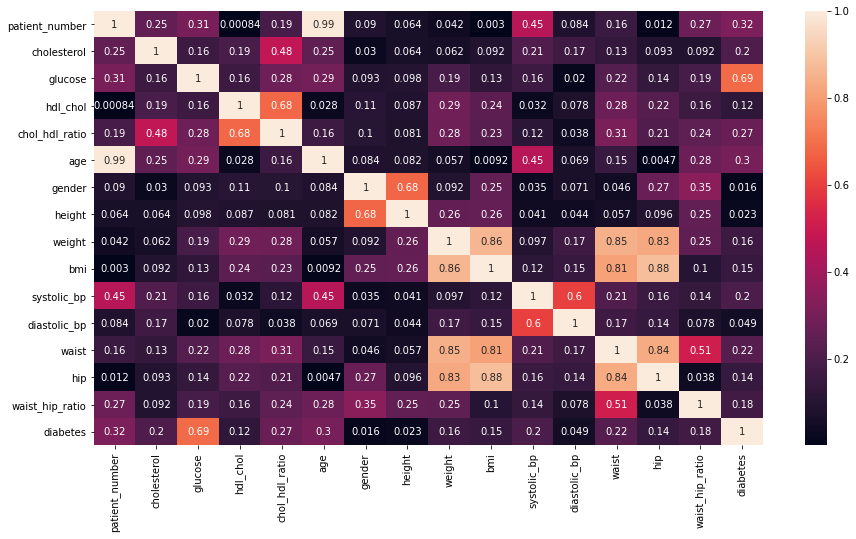

In [89]:
corel = df.corr(method = 'pearson').abs()
fig = plt.figure(figsize=(15,8))
sns.heatmap(corel, annot = True)

## EDA (part II)

### how many of componenet are explaining what amount of variance

Text(0, 0.5, 'variance')

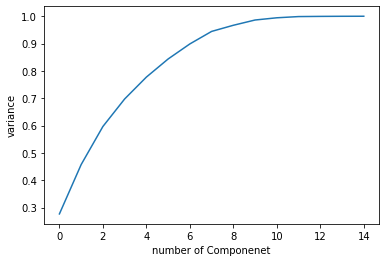

In [90]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of Componenet')
plt.ylabel('variance')

In [91]:
pca = PCA(n_components = 8, random_state = 42)

In [92]:
x_pca = pca.fit_transform(X_std)

In [93]:
pca.explained_variance_ratio_

array([0.27666311, 0.18056501, 0.13935875, 0.10068229, 0.08005678,
       0.06627018, 0.05510995, 0.0457768 ])

Text(0, 0.5, 'second p component')

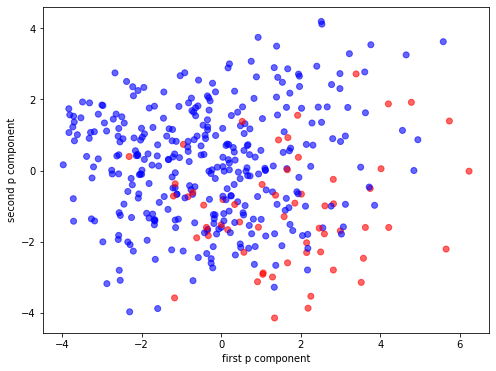

In [94]:
plt.figure(figsize = (8 ,6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],c = df["diabetes"], cmap= plt.cm.get_cmap('bwr', 10), alpha =0.6 )

plt.xlabel("first p component")
plt.ylabel("second p component")

In [95]:
PCA_df = pd.DataFrame(x_pca)
PCA_df.columns = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
print(PCA_df.shape)
print(y.shape)

(390, 8)
(390,)


In [96]:
PCA_df = pd.concat([PCA_df, y], axis=1)

In [97]:
PCA_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,diabetes
0,-2.972281,1.827874,0.335368,1.085563,0.675167,-0.064193,-0.438704,0.960265,0
1,-2.668630,2.747383,0.130446,1.673787,-0.429989,-0.631967,-0.279909,0.744258,0
2,-0.568636,2.544427,-0.539053,0.143815,0.139479,1.122281,-0.460534,0.453367,0
3,-3.525050,1.484533,0.595290,0.573568,0.620164,1.183772,0.506478,0.483744,0
4,-3.087761,1.586520,-0.416294,-1.128142,0.341662,0.031628,0.702451,0.588176,0


## Resampling the Data  < underSampling >

In [98]:
counts_class_0, counts_class_1 = PCA_df['diabetes'].value_counts() 
counts_class_1

60

In [99]:
df_class_0 = PCA_df[PCA_df['diabetes'] == 0]
df_class_1 = PCA_df[PCA_df['diabetes'] == 1]
df_class_0

,f1,f2,f3,f4,f5,f6,f7,f8,diabetes
0,-2.972281,1.827874,0.335368,1.085563,0.675167,-0.064193,-0.438704,0.960265,0
1,-2.668630,2.747383,0.130446,1.673787,-0.429989,-0.631967,-0.279909,0.744258,0
2,-0.568636,2.544427,-0.539053,0.143815,0.139479,1.122281,-0.460534,0.453367,0
3,-3.525050,1.484533,0.595290,0.573568,0.620164,1.183772,0.506478,0.483744,0
4,-3.087761,1.586520,-0.416294,-1.128142,0.341662,0.031628,0.702451,0.588176,0
...,...,...,...,...,...,...,...,...,...
383,1.526823,-2.111731,2.185141,0.171471,-0.249380,-0.546354,-0.640755,-0.766049,0
384,1.334841,-3.277928,0.215139,0.740171,1.104536,-0.790734,-0.026159,-1.457865,0
385,-0.250250,-2.475064,2.296211,1.327011,-0.015382,-0.905825,-0.691237,-0.068090,0
387,-1.594866,-3.877618,4.977781,-1.965082,0.439401,1.370367,0.654316,-1.167628,0


In [100]:
df_under_class_0 = df_class_0.sample(counts_class_1, random_state = 42)

In [101]:
df_under = pd.concat([df_under_class_0, df_class_1], axis = 0)

In [102]:
df_under.shape

(120, 9)

Random under-sampling:
0    60
1    60
Name: diabetes, dtype: int64


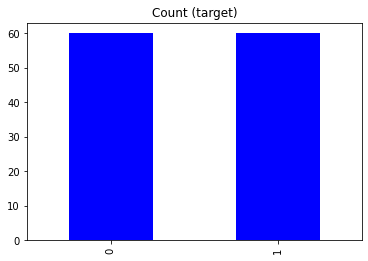

In [103]:
print('Random under-sampling:')
print(df_under['diabetes'].value_counts())

df_under['diabetes'].value_counts().plot(kind='bar', title='Count (target)',color = ["blue"]);

## Splitting data

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
trainset, testset = train_test_split(df_under, test_size=0.2, random_state=42)

In [106]:
X_train = trainset.drop(['diabetes'],axis=1)
y_train = trainset['diabetes']
X_test = testset.drop(['diabetes'],axis=1)
y_test = testset['diabetes']

In [107]:
X_train.shape

(96, 8)

## Training the model

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,  confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree

Accuracy =  0.9166666666666666


<AxesSubplot:>

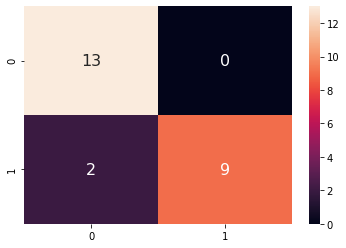

In [109]:
model = LogisticRegression(solver='sag',max_iter  = 10000 ,random_state=42)#cost function reach to zero

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#---------------------------------------------------
print('Accuracy = ', accuracy_score(y_test, y_pred))
#print("precision = ", precision_score(y_test, y_pred) )
#print("recall = ", recall_score(y_test, y_pred) )
#---------------------------------------------------
conv = confusion_matrix(y_test, y_pred)
sns.heatmap(conv, annot = True, annot_kws = {"size" : 16})

Accuracy =  0.7916666666666666


<AxesSubplot:>

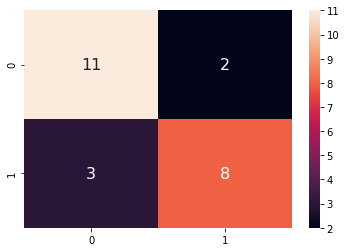

In [110]:
model = SVC(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#---------------------------------------------------
print('Accuracy = ', accuracy_score(y_test, y_pred))
#print("precision = ", precision_score(y_test, y_pred) )
#print("recall = ", recall_score(y_test, y_pred) )
#---------------------------------------------------
conv = confusion_matrix(y_test, y_pred)
sns.heatmap(conv, annot = True, annot_kws = {"size" : 16})

## Resampled Training  without PCA:

### Resample again

In [111]:
counts_class_0_new, counts_class_1_new = df['diabetes'].value_counts() 
df_class_0_new = df[ df['diabetes'] == 0 ]
df_class_1_new = df[ df['diabetes'] == 1 ]
df_under_class_0_new = df_class_0_new.sample(counts_class_1_new, random_state = 42)
df_under_new = pd.concat([df_under_class_0_new, df_class_1_new], axis = 0)
df_under_new.shape

(120, 16)

In [112]:
df_under_new = df_under_new.drop('patient_number', axis = 1)

In [113]:
trainset, testset = train_test_split(df_under_new, test_size=0.2, random_state=42)

In [114]:
X_train_2 = trainset.drop(['diabetes'],axis=1)
y_train_2 = trainset['diabetes']
X_test_2 = testset.drop(['diabetes'],axis=1)
y_test_2 = testset['diabetes']

Accuracy =  0.9166666666666666


<AxesSubplot:>

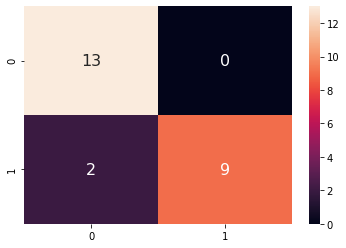

In [115]:
model = LogisticRegression(solver='sag',max_iter = 10000 ,random_state=42)

model.fit(X_train_2, y_train_2)

y_pred_2 = model.predict(X_test_2)

#---------------------------------------------------
print('Accuracy = ', accuracy_score(y_test_2, y_pred_2))
#print("precision = ", precision_score(y_test, y_pred) )
#print("recall = ", recall_score(y_test, y_pred) )
#---------------------------------------------------
conv = confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(conv, annot = True, annot_kws = {"size" : 16})

Accuracy =  0.9583333333333334


<AxesSubplot:>

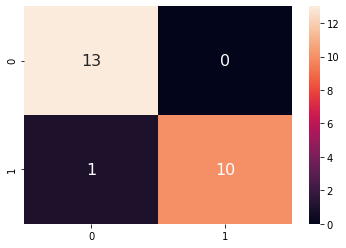

In [116]:
model = SVC(random_state=42)

model.fit(X_train_2, y_train_2)

y_pred_2 = model.predict(X_test_2)

#---------------------------------------------------
print('Accuracy = ', accuracy_score(y_test_2, y_pred_2))

#print("precision = ", precision_score(y_test, y_pred) )
#print("recall = ", recall_score(y_test, y_pred) )
#---------------------------------------------------
conv = confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(conv, annot = True, annot_kws = {"size" : 16})

Accuracy =  0.875


<AxesSubplot:>

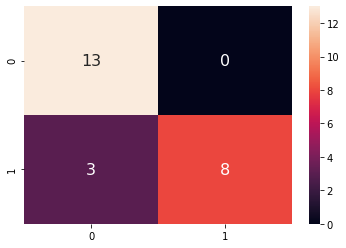

In [117]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train_2, y_train_2)

y_pred_2 = model.predict(X_test_2)

#---------------------------------------------------
print('Accuracy = ', accuracy_score(y_test_2, y_pred_2))
#print("precision = ", precision_score(y_test, y_pred) )
#print("recall = ", recall_score(y_test, y_pred) )
#---------------------------------------------------
conv = confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(conv, annot = True, annot_kws = {"size" : 16})

conclusions : 
    accuracy after applying feature selection:
    
                                                 1-Logistic Regression: (0.9166666666666666)
                                                 2-Support Vector Machine (SVM): (0.7916666666666666)
    accuracy without feature selection:
    
                                                1-Logistic Regression: (0.9166666666666666)
                                                2-Support Vector Machine (0.9583333333333334)
        

### BEST Accuracy :  SVM (95%) 